In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [3]:
def clean_furniture_dataset(df):
    # Remove duplicate rows if any
    df = df.drop_duplicates()

    # Convert columns to appropriate datatypes
    if 'price' in df.columns:
        df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    if 'originalPrice' in df.columns:
        df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float)

    # Converting tagText to categorical dtype and simplify categories
    if 'tagText' in df.columns:
        df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')
        df['tagText'] = df['tagText'].astype('category')

    # Handle missing values
    # For numeric columns filling NaNs with median
    num_cols = df.select_dtypes(include='number').columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    # For categorical columns filling NaNs with mode or 'Unknown'
    cat_cols = df.select_dtypes(include='category').columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

    return df

df = clean_furniture_dataset(df)


In [4]:
def covid_data_understanding(df):
    print(f"{'' * 50} Data Information {'' * 50}")
    display(df.info())
    
    print(f"\n{'' * 50} Checking For Duplicate Rows {'' * 50}")
    display(f"Total Duplicates: {df.duplicated().sum()}")
    
    print(f"\n{'' * 50} Numerical Columns Summary {'' * 50}")
    display(df.describe())
    
    print(f"\n{'' * 50} Categorical Columns Summary {'' * 50}")
    display(df.describe(include='object'))
    
    print(f"\n{'' * 50} Sample Data {'' * 50}")
    display(df.head())

covid_data_understanding(df)

 Data Information 
<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   productTitle   1906 non-null   object  
 1   originalPrice  1906 non-null   float64 
 2   price          1906 non-null   float64 
 3   sold           1906 non-null   int64   
 4   tagText        1906 non-null   category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 76.4+ KB


None


 Checking For Duplicate Rows 


'Total Duplicates: 0'


 Numerical Columns Summary 


,originalPrice,price,sold
count,1906.000000,1906.000000,1906.000000
mean,127.185241,154.360152,24.449633
std,219.245923,176.969831,260.247848
min,3.630000,0.990000,0.000000
25%,87.155000,47.465000,1.000000
50%,87.155000,112.480000,3.000000
75%,87.155000,191.542500,9.750000
max,3265.130000,2876.380000,10000.000000



 Categorical Columns Summary 


,productTitle
count,1906
unique,1793
top,Makeup Table Makeup Vanity With Lights Make Up...
freq,5



 Sample Data 


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,87.155,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,87.155,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.400,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",87.155,111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,48.820,21.37,1,Free shipping


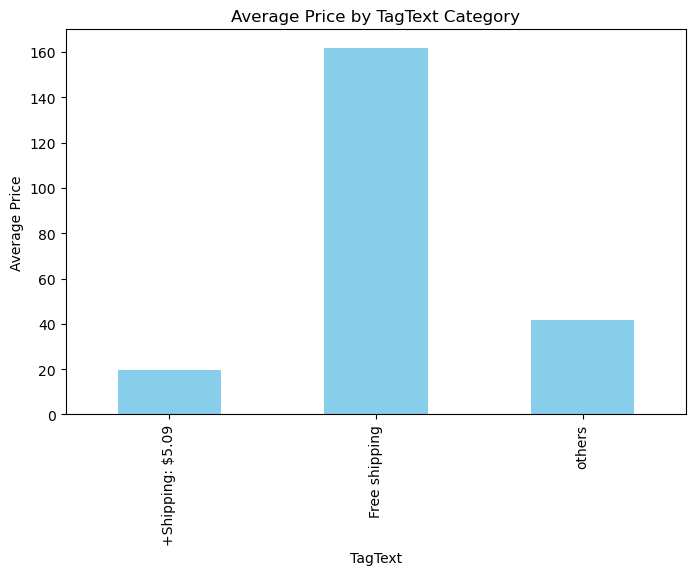

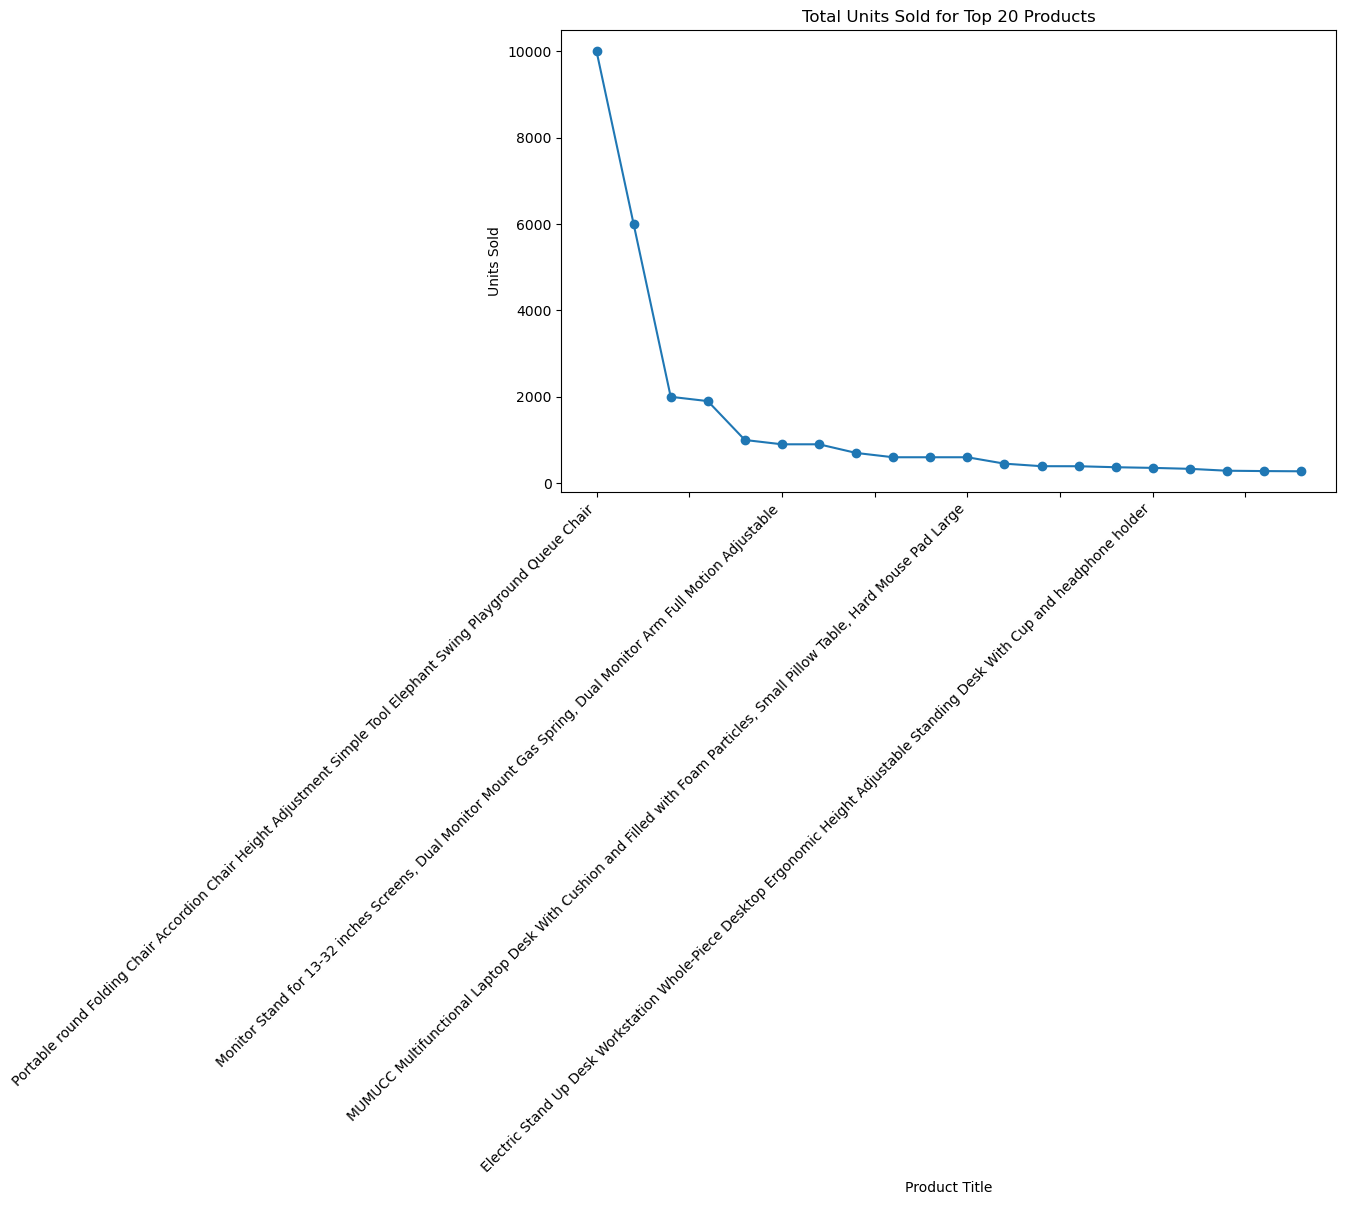

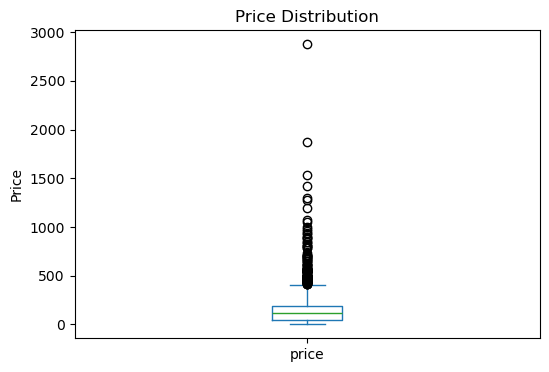

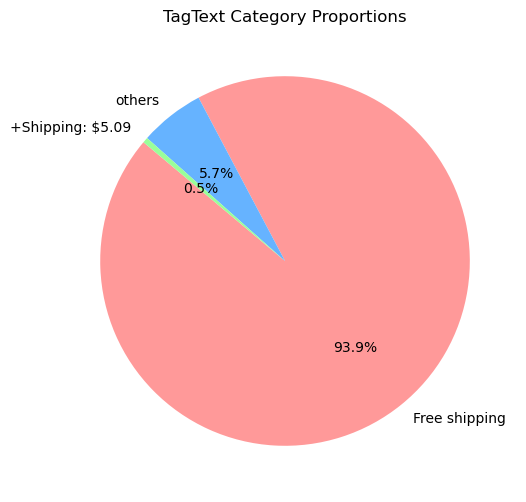

In [5]:
def visualize_furniture_data_simple(df):

    plt.figure(figsize=(8, 5))
    # Bar plot: avg price by tagText
    avg_price_by_tag = df.groupby('tagText')['price'].mean()
    avg_price_by_tag.plot(kind='bar', color='skyblue')
    plt.title('Average Price by TagText Category')
    plt.xlabel('TagText')
    plt.ylabel('Average Price')
    plt.show()
    
    # Line plot: total units sold by productTitle (limited to top 20 for clarity)
    if 'productTitle' in df.columns and 'sold' in df.columns:
        top_products = df.groupby('productTitle')['sold'].sum().sort_values(ascending=False).head(20)
        plt.figure(figsize=(10, 6))
        top_products.plot(kind='line', marker='o')
        plt.title('Total Units Sold for Top 20 Products')
        plt.xlabel('Product Title')
        plt.ylabel('Units Sold')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Box plot: price distribution
    plt.figure(figsize=(6, 4))
    df['price'].plot(kind='box')
    plt.title('Price Distribution')
    plt.ylabel('Price')
    plt.show()
    
    # Pie chart: tagText category proportions
    plt.figure(figsize=(6, 6))
    df['tagText'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title('TagText Category Proportions')
    plt.ylabel('')
    plt.show()


visualize_furniture_data_simple(df)
